### IMPORTANT LIBRARIES ###

In [1]:
import pandas as pd 
import numpy as np
import matplotlib as plt
import csv
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score


### DATA IMPORTING AND CLEANING MISSING VALUES ###


In [3]:
df_pre = pd.read_csv("CSV/Twitter_Data.csv")

In [5]:
cnt_minus_one = 0
cnt_zero = 0
cnt_one = 0

for category in df_pre['category']:
    if category == -1.0:
        cnt_minus_one += 1
    elif category == 0:
        cnt_zero+=1
    elif category == 1:
        cnt_one += 1
        
all_them = cnt_minus_one+ cnt_zero+ cnt_one
print('-1: ', cnt_minus_one)
print('0: ', cnt_zero)
print('1: ', cnt_one)
print("all: ", all_them)

-1:  35510
0:  55213
1:  72250
all:  162973


In [5]:
df_pre.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [6]:
df_pre.dropna(subset = ['category'],inplace=True)

In [7]:
df_pre.dropna(subset = ['clean_text'],inplace=True)

In [9]:
# create new Dataset - to .csv file
df_pre.to_csv('twitter_clean_dataset.csv')

### NEW DATASET LOADING ###

In [34]:
import pandas as pd
import numpy as np
import nltk
import re
import emoji
import contractions
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [35]:
df = pd.read_csv("CSV/twitter_clean_dataset.csv", index_col=0)

In [36]:
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [46]:
def preprocess_text(text):
    # lowercase
    text = text.lower()

    # HTML 
    text = BeautifulSoup(text, "html.parser").get_text()

    # can't - > cannot =>Spell Correction
    text = contractions.fix(text)

    text = re.sub(r'[^a-zA-Z\s]', '', text)# non alphebets


    tokens = word_tokenize(text)# Tokenize 

    # stopwords || lemmatizer
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]

    # join words 
    text = ' '.join(tokens)
    return text




df['clean_text'] = df['clean_text'].apply(preprocess_text)


In [49]:
#removing short words - non sensitive
df['clean_text'] = df['clean_text'].apply(lambda x : ' '.join([w for w in x.split() if len(x) > 3]))

In [51]:
# texts = df['clean_text'].astype(str).str.lower() # 
# labels = df['category']

#dont use here

In [52]:
token_word = df['clean_text'].apply(lambda x : x.split())
token_word

0         [modi, promised, minimum, government, maximum,...
1             [talk, nonsense, continue, drama, vote, modi]
2         [say, vote, modi, welcome, bjp, told, rahul, m...
3         [asking, supporter, prefix, chowkidar, name, m...
4         [answer, among, powerful, world, leader, today...
                                ...                        
162975    [crore, paid, neerav, modi, recovered, congres...
162976    [dear, r, terrorist, payal, gawar, modi, killi...
162977                    [cover, interaction, forum, left]
162978    [big, project, came, india, modi, dream, proje...
162979    [ever, listen, like, gurukul, discipline, main...
Name: clean_text, Length: 162969, dtype: object

In [53]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

token_word = token_word.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
token_word.head()

0    [modi, promis, minimum, govern, maximum, gover...
1          [talk, nonsens, continu, drama, vote, modi]
2    [say, vote, modi, welcom, bjp, told, rahul, ma...
3    [ask, support, prefix, chowkidar, name, modi, ...
4    [answer, among, power, world, leader, today, t...
Name: clean_text, dtype: object

In [54]:

#for error : TypeError: Value after * must be an iterable, not float ->  Solution
df['clean_text'] = df['clean_text'].astype(str)



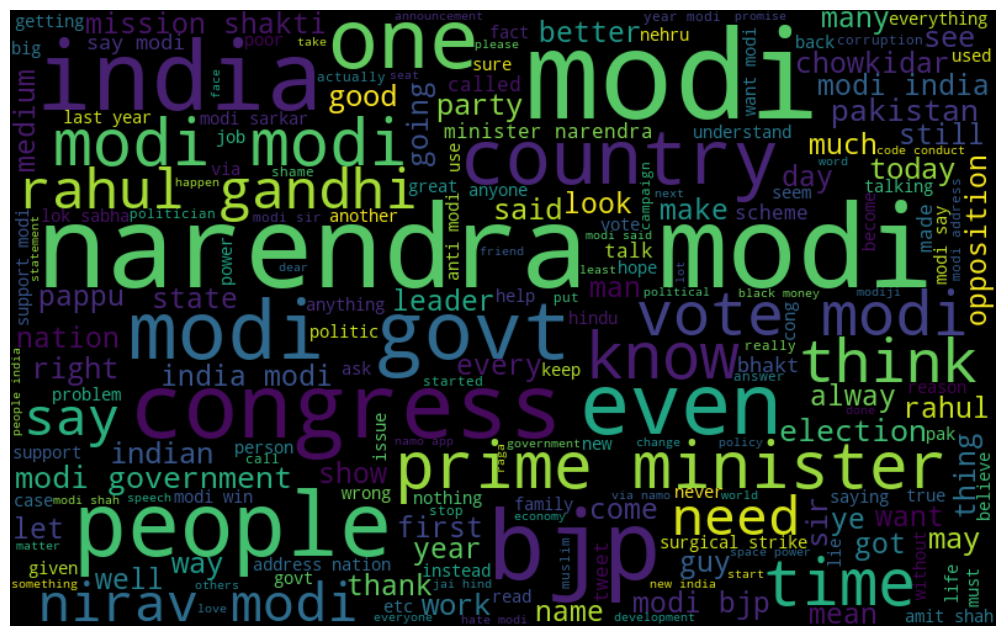

In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_words = ' '.join([sentence for sentence in df['clean_text']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud.png')
plt.show()


In [6]:
daf = pd.read_csv('CSV/preprocessed_dataset.csv')

In [8]:
daf.isnull().sum()
# daf.dropna(subset='clean_text', inplace=True)

Unnamed: 0    0
clean_text    0
category      0
dtype: int64

In [16]:
dfa = pd.DataFrame()

dfa['clean_sentences'] = daf['clean_text']
dfa['category'] = daf['category']
dfa.isnull().sum()

clean_sentences    0
category           0
dtype: int64

In [17]:
dfa.to_csv("preprocessed_dataset.csv")


In [ ]:
"""
Lowercasing
Expanding Contractions
Removing Punctuation and Numbers
Spell Correction
Tokenization
Removing Stopwords
Lemmatization
"""